# Сборный проект 1

## Вводные данные

Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на будущий год.

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Молодец, что начинаешь проект с описания.

In [4]:
#Подключим необходимые библиотеки для выполнения анализа
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


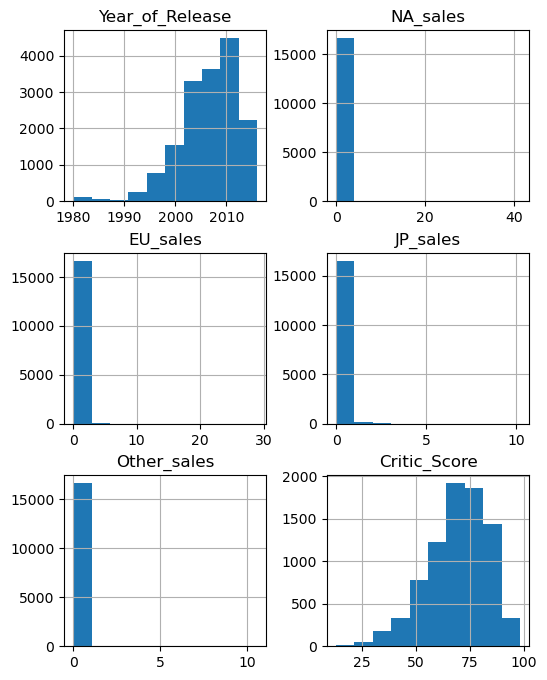

In [5]:
data = pd.read_csv('G:\My Drive\VS code\YPracticum prj\Sborniy_1\games.csv')
data.info()
data.hist(figsize=(6,8))
data.head()



<div class="alert alert-warning">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b> Лучше считывать файл и импортировать библиотеки в разных ячейках. Если нужно будет что то изменить, не придется заново считывать файл, особенно если он большой по размеру.

In [6]:
data.isnull().sum() #посмотрим сколько всего пропусков в каждом столбце

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [7]:
data.duplicated().sum() #посмотрим сколько всего явных дубликатов

0

In [8]:
data['Platform'].value_counts() # представим все платформы и количество игр выпущенных для них

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [9]:
data['Genre'].value_counts() #проверим есть ли повторения в жанрах и сколько записей в каждом

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [10]:
data[data['Year_of_Release'].isnull()].head() #посмотрим на строки с пропусками в годах выпуска игры

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


In [11]:
data[data['Critic_Score'].isnull()].head() #посмотрим на строки с пропусками в оценках критиков

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


In [12]:
data[data['User_Score'].isnull()].head() #посмотрим на строки с пропусками в оценках геймеров

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


In [13]:
data[data['Rating'].isnull()].head() #посмотрим на строки с пропусками в оценках агенства ESRB

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


<div class="alert alert-warning">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b> Лучше не выводить датафреймы целиком, можно использовать метод head().

<div class="alert alert-warning">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b> После того, как ты рассмотрел данные, стоит составить их краткое описание: количество пропусков, типы распределений, аномальные значения.

<div style="border:solid blue 3px; padding: 20px">
<div class="alert alert-info">

Датасет содержит порядка 17тыс строчек в 11 колонках. Порядка 3 сотен пропусков в колонке "year_of_release" и по 6-8 тысяч пропусков в колонках с рейтингами. Данные требуют приведения в общепринятый и удобоваримый вид. Часть пропусков придется заполнить, часть значений удалить. В некоторых столбцах необходимо поменять тип данных. В целом датасет выглядит достаточно репрезентативным для проведения анализа.
    
</div>
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера V2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Супер!

## Подготовка данных

#### to do:
1. Необходимо заменить названия столбцов (привести к нижнему регистру);
2. Преобразовать данные в нужные типы. Описать, в каких столбцах заменим тип данных и почему;
3. Обработать пропуски при необходимости:
    
    - Объяснить, почему заполнили пропуски определённым образом или почему не стали это делать;
    - Описать причины, которые могли привести к пропускам;
    - Обратить внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разобрать это значение и описать, как его обработать;
    - Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.

In [14]:
data = data.rename(columns={"Name":"game_title"})# переименуем первый столбец для удобства
data.columns = data.columns.str.lower() # переименуем все столбцы в нижний регистр
data.info()
data['year_of_release'].isnull().sum() # посмотрим сколько пропусков в годах релиза

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   game_title       16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


269

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Правильно привел названия столбцов к нижнему регистру.

In [15]:
data = data.dropna(subset=['year_of_release'], axis=0) # удалим все строки с пропусками в годах релиза

In [16]:
data[data['game_title'].isnull()] # в этих строках много пропусков, поэтому они не несут достаточно полезной информации, удаляем из датафрейма
data = data.dropna(subset=['game_title'], axis=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   game_title       16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


1. Перевели все названия столбцов в нижний регистр и сменили название первого столбца на "game_title". 
2. Удалили все строчки с пропусками в годах релиза.
3. Удалили две строчки с пропусками в названии игр, жанре и оценках - в них нет смысла для анализа.
Всего осталось 15958 строчек в датасете.


<div class="alert alert-warning">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b> Пропусков в признаке года релиза достаточно мало и лучше их сразу удалить. Корректным способом их не заполнить, на разных платформах год не всегда может быть одинаковым.
    
Удалить игры без названия верное решение.

<div class="alert alert-success">
<h2> Комментарий ревьюера V2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Все правильно доработал.

C:\Users\Nik\AppData\Local\Temp\ipykernel_11292\1038607613.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tbd['total_sales'] = tbd['na_sales'] + tbd['eu_sales'] + tbd['jp_sales'] + tbd['other_sales'] # посчитаем сколько продаж всего приходится на такие строки


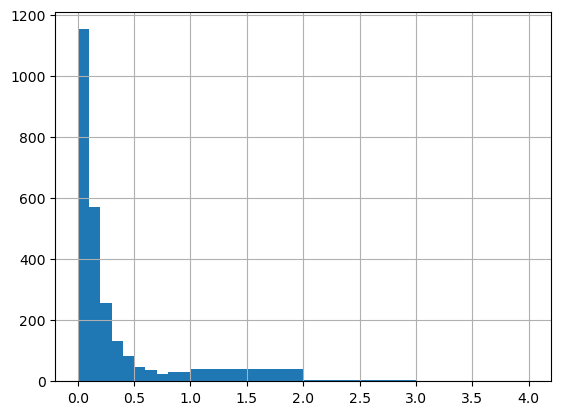

In [17]:
tbd = data.loc[data['user_score'] == 'tbd'] # рассмотрим строки со значением "tbd" 
tbd['total_sales'] = tbd['na_sales'] + tbd['eu_sales'] + tbd['jp_sales'] + tbd['other_sales'] # посчитаем сколько продаж всего приходится на такие строки
tbd['total_sales'].hist(bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1, 2, 3, 4]) #большинство игр с рейтингом 'tbd' продавались небольшим тиражем
data['user_score'] = data['user_score'].replace('tbd', np.nan, regex=True)
data['user_score'] = data['user_score'].astype(float)

Беглый поиск в гугле подсказал, что значение пользовательского рейтинга 'tbd' может быть понято, как to be done - будет сделано, то есть на данный момент пользовательского рейтинга нет в 2424 строчках. Скорее всего это произошло поскольку данные игры не продавались или не продались достаточно широко в мире или были в основном представлены в одном географическом сегменте. Удалять эти данные будет неправильно, поскольку для анализа факторов, влияющих на успех того или иного IP данные о провалах весьма важны. Поэтому записи "tbd" заменены на Nan и тип данных в столбце приведен в float.

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Именно так, все верно.

In [18]:
data[data['user_score'].isnull()].head()

,game_title,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


In [19]:
data[data['critic_score'].isnull()].head()

,game_title,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


In [20]:
data[data['rating'].isnull()].head()

,game_title,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


Пропуски в столбцах рейтингов скорее всего могли возникнуть по следующим причинам:
1. Игра вышла давно и собрать данные по оценкам не представляется возможным.
2. Игра не продавалась на всех рынках достаточно широко, чтобы быть замеченной и оцененной.
3. Entertainment Software Rating Board основана в 1994 году и рейтинги более ранних игр просто не существуют.
4. Entertainment Software Rating Board выдает рейтинги продуктам выпущенным в США и Канаде, в Европе и  Японии этим занимаются другие компании PEGI и CERO. Следовательно, для игр, которые продавались только на рынках Японии или Европы рейтинга в датасете нет. 

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Все верно, согласен с тобой.

In [21]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   game_title       16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  total_sales      16444 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.6+ MB


game_title            0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
total_sales           0
dtype: int64

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Суммарные продажи посчитаны правильно.

### Общие выводы по подготовке данных
1. Всего было удалено 2 строчки данных, в которых было большинство столбцов с пропусками.
2. Все имена колонок приведены к змеиному регистру, первая колонка переименована для наглядности.
3. Формат данных изменен на более подходящий в 3 и 10 колонке.
4. Добавлена новая колонка данных с суммарными продажами во всех регионах.


## Исследовательский анализ данных

#### to do:
- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

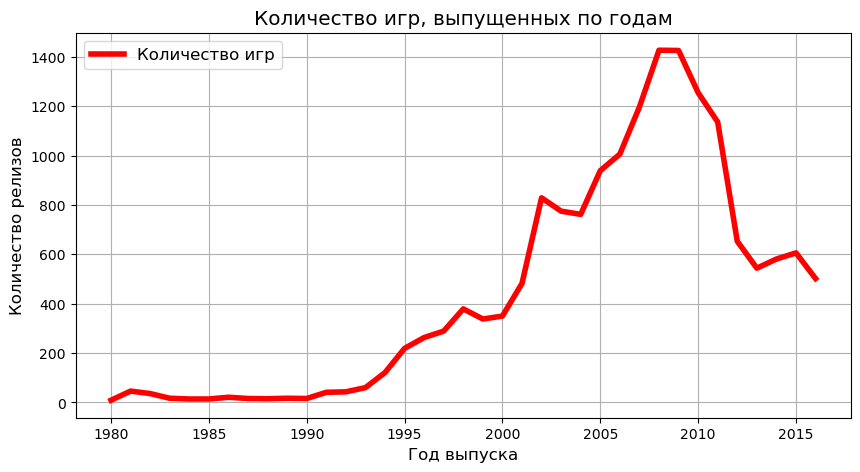

In [22]:
games_by_years = data.groupby('year_of_release')['game_title'].count()
games_by_years.plot(kind='line', figsize=(10,5), grid=True, color='red', linewidth= 4)
plt.title('Количество игр, выпущенных по годам', fontsize='x-large')
plt.xlabel('Год выпуска', fontsize='large')
plt.ylabel('Количество релизов', fontsize='large')
plt.legend(['Количество игр'], fontsize='large')

Из графика видно следующее:
1. Пик индустрии приходится на период с 2005 по 2010 года.
2. Заметный рост количества релизов в год начался примерно в 1995 году.
3. После 2010 года наблюдается резкий спад со ступенькой в 2015 году. Возможно, это связано с изменением структуры рынка игр и потребительскими сценариями.

Вероятно, для анализа факторов, влияющих на успешность игр стоит взять часть данных начиная с 1995 года. Такое заключение базируется на логике о том, что примерно в этот период объем выпущенных игр стал значительным и их распространение стало более глобальным, так же как и консолей. А до 95 года игры были крайне нишевым продуктом в силу новизны феномена и малой распространенности игровых устройств.

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Абсолютно верный вывод!

#### to do:
- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывайте в работе данные за предыдущие годы.

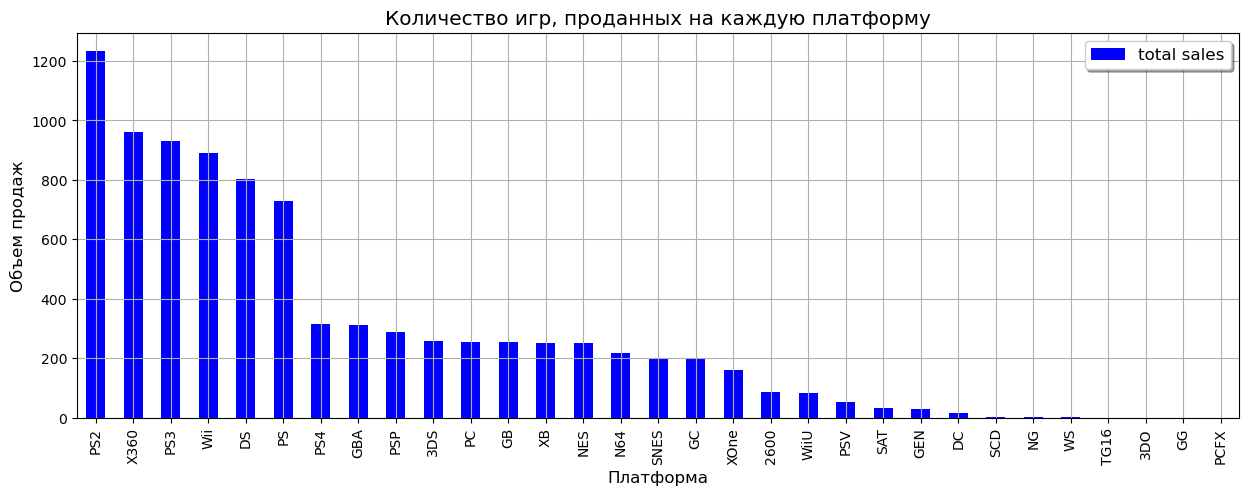

In [23]:
platforms_by_years = data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
top_platforms=platforms_by_years.sort_values(by='total_sales', ascending=False)
top_platforms.plot(kind='bar', figsize=(15,5), color='blue', grid=True)
plt.title('Количество игр, проданных на каждую платформу', fontsize='x-large')
plt.xlabel('Платформа', fontsize='large')
plt.ylabel('Объем продаж', fontsize='large')
plt.legend(loc = 'upper right', labels=['total sales'], fontsize='large', fancybox=True, shadow=True)
top_10 = top_platforms.head(10) # топ 10 наиболее прибыльных платформ


Судя по графику топ-6 платформ имеют большинство релизов. Поскольку они включают в себя платформы прошлых поколений, чьи жизненные циклы скорее всего скоро подходя к концу принято решение взять в рассмотрение топ-10 платформ. В топ-10 входят платформы PC (не подвержена поколенческим сменам так как остальные платформы) и PS4, жизненный цикл которой скорее всего только начался, а также портативная PSP как представитель нового формата мобильного гейминга. 

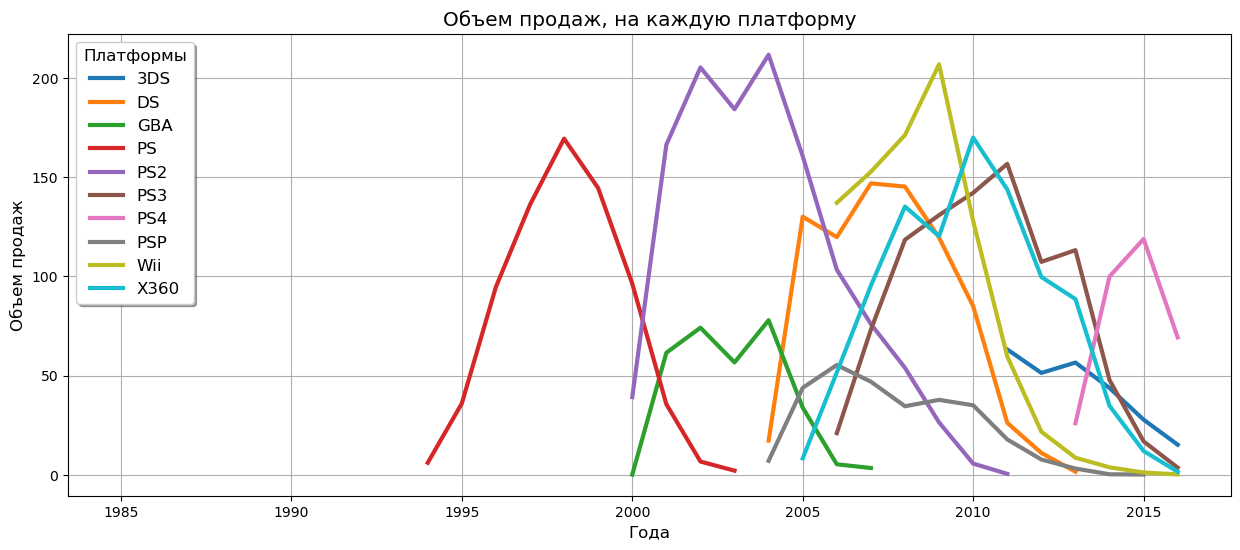

In [24]:
filter_platforms = top_10.index.to_list() #создаем фильтр для всего датасета
sorted_platforms= data.loc[data['platform'].isin(filter_platforms)]
sorted_platforms_pivot = sorted_platforms.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
sorted_platforms_pivot.plot(kind='line',figsize=(15,6), grid=True, linewidth= 3)
plt.title('Объем продаж, на каждую платформу', fontsize='x-large')
plt.xlabel('Года', fontsize='large')
plt.ylabel('Объем продаж', fontsize='large')
plt.legend(loc = 'upper left', title='Платформы', fontsize='large', title_fontsize='large', fancybox=True, shadow=True)

На графике представлен распределенный объем продаж на каждую платформу из топ-10 наиболее прибыльных платформ. Можно сделать следующие выводы:
1. PC как игровая платформа имеет примерно одинаковую популярность во все времена, с небольшим всплеском интереса в 10х годах. Объяснимо, так как ПК-гейминг наиболее дорогой и требовательный по сравнению с консолями.
2. Жизненный цикл PS начался примерно в 94 году и окончился в 2003.
3. Жизненный цикл PS2 начался в 2000 году и окончился в примерно 2011.
4. Жизненный цикл PS3 начался в 2005 году и окончился в примерно 2016.
5. Жизненный цикл DS начался примерно в 2004 году и окончился в примерно 2013.
6. Жизненный цикл Wii начался примерно в 2006 году и окончился в примерно 2016.
7. Жизненный цикл PSP начался примерно в 2004 году и окончился в примерно 2015.
8. Жизненный цикл X360 начался в 2005 году и окончился в примерно 2016.
9. Жизненный цикл PS4 начался примерно в 2014 году.
10. Жизненный цикл GBA начался в 2000 году и окончился в примерно 2006.
11. Пик популярности всех платформ приходится на середину жизненного цикла (примерно 5 лет с релиза).

Из чего видно, что средняя продолжительность жизненного цикла игровых платформ, кроме PC, составляет порядка 10 лет.
Учитывая выводы из предыдущих этапов и приведенные выше логично предположить, что для дальнейшей работы нет смысла использовать данные о продажах игр до 1995 года, поскольку до этого момента индустрия находилась в зародышевом состоянии (малое количество платформ и низкие объемы продаж игр) и устоявшихся паттернов отследить не удастся. Говоря о прогнозе на 2017 год важно принять во внимание популярность платформ в прошлом и пересечения их жизненных циклов. 

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Верно, средний срок продажи примерно 10 лет. А пик продаж составляет около 5 лет.

#### to do:
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера V1<a class="tocSkip"></h2>


<b>На доработку🤔:</b>
Нельзя брать данные с 1995 года для анализа. Это слишком большой срок, к 2017 году многие платформы уже прекратят свое существование, а ты будешь учитывать их пик продаж, из-за чего прогноз сместится в пользу исторических значений. В качестве актуального периода нужно взять срок, за который происходит пик продаж, это где то 4-5 лет.

<div class="alert alert-warning">
<h2> Комментарий ревьюера V2<a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b> Это по прежнему достаточно большой период для анализа, 7 лет уже затронут срок за который платформы теряют популярность.

<div class="alert alert-success">
<h2> Комментарий ревьюера V3<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> А вот этот срок оптимальный!

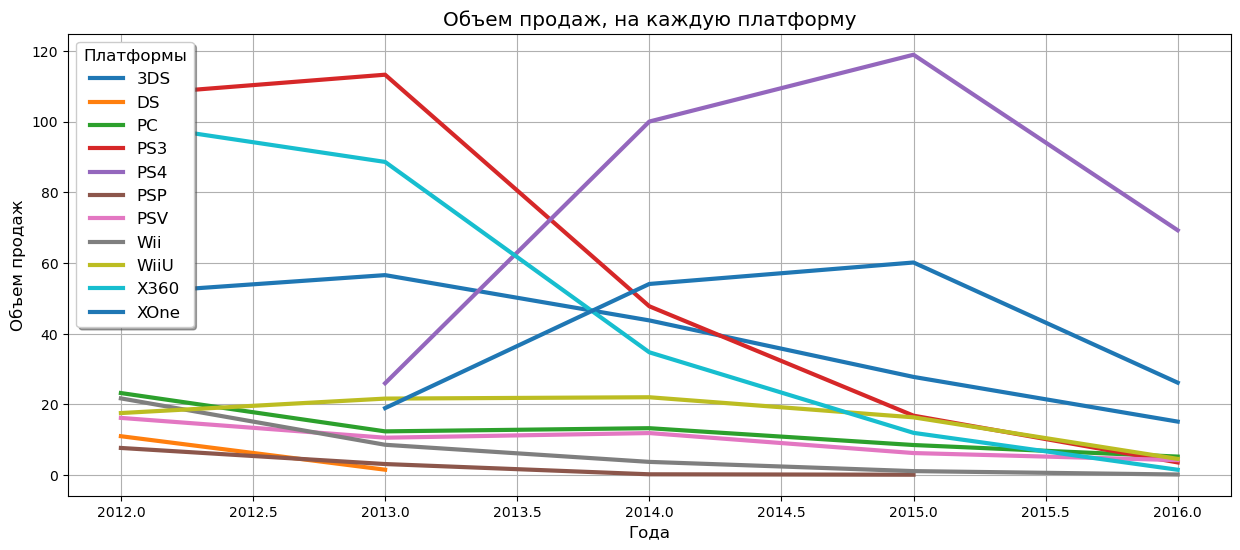

In [25]:
data = data[data['year_of_release'] >= 2012] # перезапишем датасет без данных до 2012 года
data_pivot = data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
data_pivot.plot(kind='line',figsize=(15,6), grid=True, linewidth= 3)
plt.title('Объем продаж, на каждую платформу', fontsize='x-large')
plt.xlabel('Года', fontsize='large')
plt.ylabel('Объем продаж', fontsize='large')
plt.legend(loc = 'upper left', title='Платформы', fontsize='large', title_fontsize='large', fancybox=True, shadow=True)

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера V1<a class="tocSkip"></h2>


<b>На доработку🤔:</b>
Не нужно ограничивать данные только топ 10 платформами за весь период. В актуальный период они могут уже исчезнуть, а на их место придут другие.

В целом, самые популярные платформы: Sony Play Station 4, XOne и 3DS. Предлагается обратить внимание в качестве перспективы для ведения рекламной кампании на 4 поколение PS и Microsoft XOne, мобильные платформы от Нинтендо и, возможно PC. как в целом наиболее потенциальные платформы в данный момент.

<div class="alert alert-success">
<h2> Комментарий ревьюера V2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Именно так, все верно.

#### to do:
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

Text(0, 0.5, 'Глобальный объем продаж')

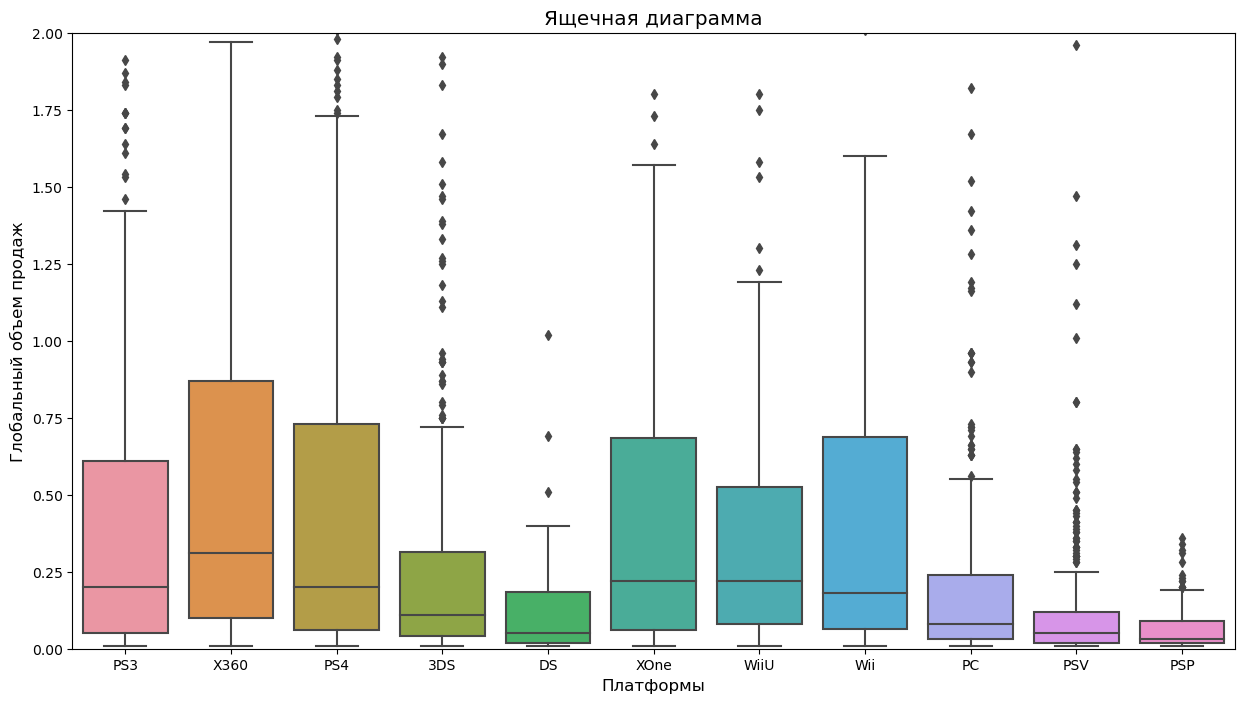

In [26]:
plt.figure(figsize=(15,8))
sns.boxplot(x='platform', y='total_sales',  data=data)
plt.title('Ящечная диаграмма', fontsize='x-large')
plt.xlabel('Платформы', fontsize='large')
plt.ylim(0,2) # ограничили диапазон от выбросов по играм-хитам
plt.ylabel('Глобальный объем продаж', fontsize='large')

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера V1<a class="tocSkip"></h2>


<b>На доработку🤔:</b>
График "ящик с усами" нужно построить на исходном датафрейме с актуальными данными, построив график по сводной таблице ты исказишь статистики, отсутствуют выбросы, не понятны статистики продаж.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера V2<a class="tocSkip"></h2>


<b>На доработку🤔:</b>
Не увидел никаких изменений в данном пункте. Почему ты строить график по сводной таблице? 

<div class="alert alert-success">
<h2> Комментарий ревьюера V3<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Все верно доработал. Сейчас можно увидеть медиану продаж игр в определенном жанре.

Рассматривая глобальные продажи в разбивке по платформам стали заметны следующие закономерности:
1. Новое поколение приставки "геймбой" Нинтендо продается лучше, чем старое.
2. Продажи игр на PC чаще хорошие чем плохие. 
3. Третье поколение платформы Сони обладает меньшей медианой чем основной конкурент XOne. Минимальные продажи примерно одинаковые.
5. Продажи игр-бестселлеров на 4 поколение консоли Sony уже гораздо выше нового поколения платформы "Майков". 
6. PSP продавалась чуть хуже, чем PS Vita.
7. Поскольку жизненный цикл PS4 только подходит к середине, можно ожидать роста ее показателей.
8. Портативные и инновационные приставки имеют разный успех.
9. Wii U  по продажам обогнала все другие портативные платформы. 

#### to do:
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.

Корр. продаж/польз. для 3DS: 0.1976, Корр. продаж/критик для 3DS: 0.3208
Корр. продаж/польз. для PS3: -0.0051, Корр. продаж/критик для PS3: 0.3315
Корр. продаж/польз. для PS4: -0.032, Корр. продаж/критик для PS4: 0.4066
Корр. продаж/польз. для XOne: -0.0689, Корр. продаж/критик для XOne: 0.417


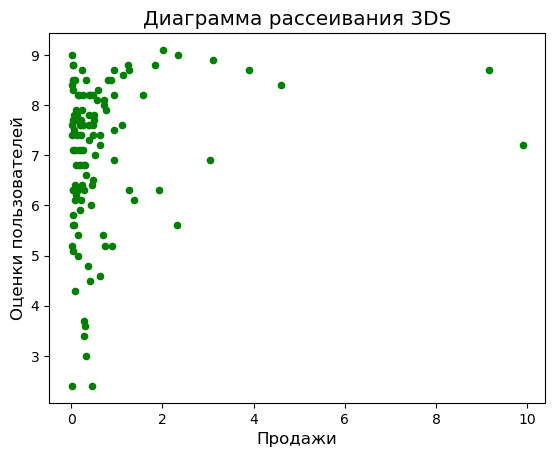

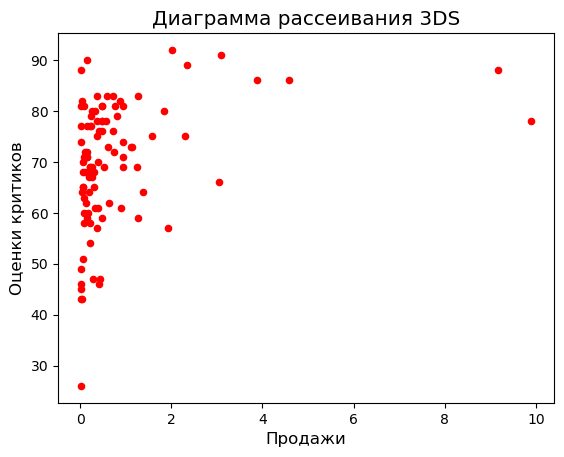

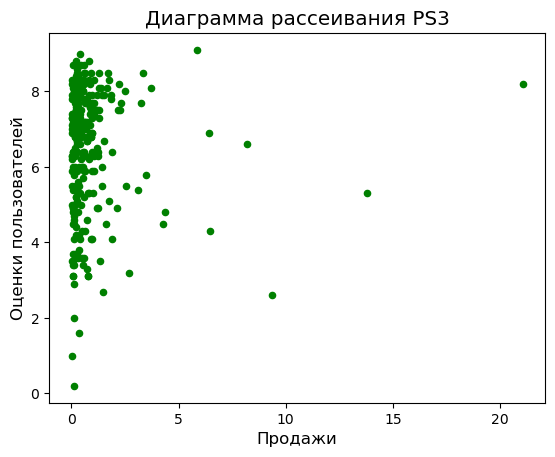

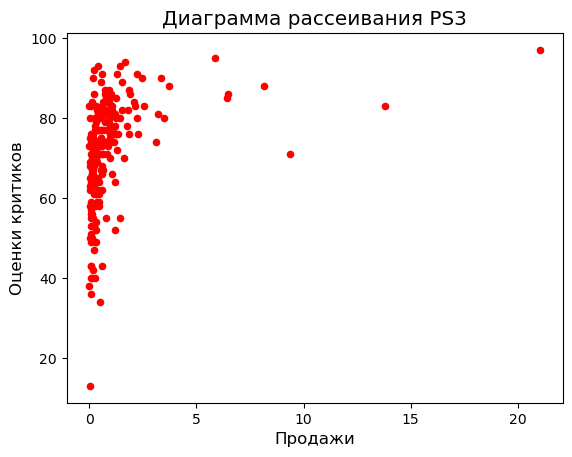

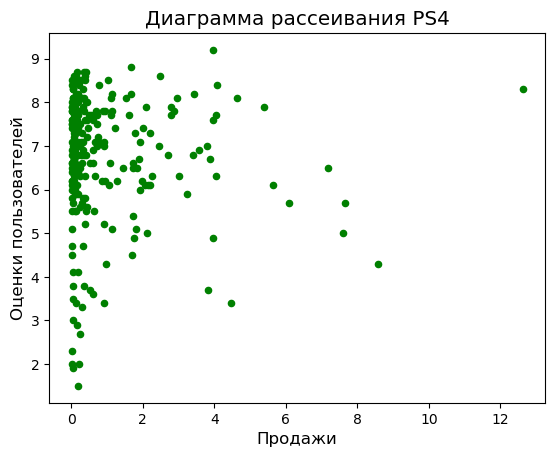

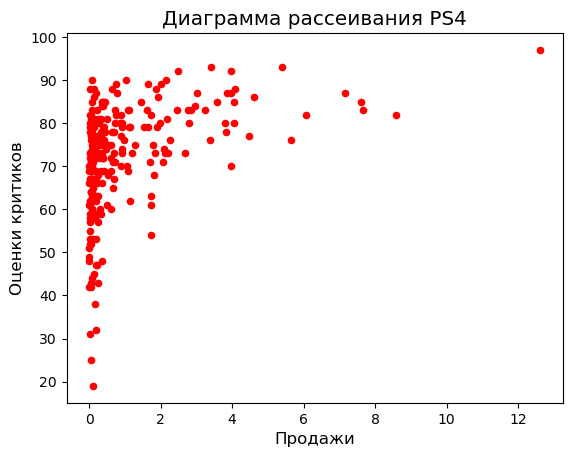

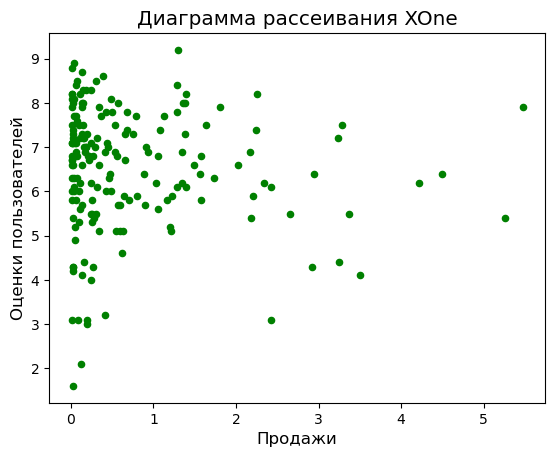

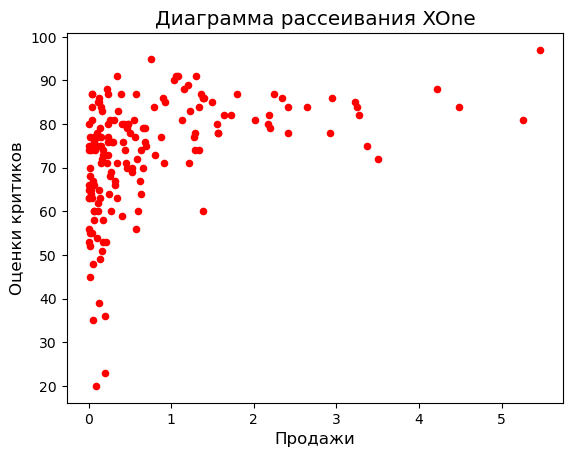

In [47]:
ds_3 = data[data['platform']=='3DS']
ds_3.plot.scatter(x='total_sales', y='user_score', c='g')
plt.title('Диаграмма рассеивания 3DS', fontsize='x-large')
plt.xlabel('Продажи', fontsize='large')
plt.ylabel('Оценки пользователей', fontsize='large')

ds_3.plot.scatter(x='total_sales', y='critic_score', c='r')
plt.title('Диаграмма рассеивания 3DS', fontsize='x-large')
plt.xlabel('Продажи', fontsize='large')
plt.ylabel('Оценки критиков', fontsize='large')

ps_3 = data[data['platform']=='PS3']
ps_3.plot.scatter(x='total_sales', y='user_score', c='g')
plt.title('Диаграмма рассеивания PS3', fontsize='x-large')
plt.xlabel('Продажи', fontsize='large')
plt.ylabel('Оценки пользователей', fontsize='large')

ps_3.plot.scatter(x='total_sales', y='critic_score', c='r')
plt.title('Диаграмма рассеивания PS3', fontsize='x-large')
plt.xlabel('Продажи', fontsize='large')
plt.ylabel('Оценки критиков', fontsize='large')

ps_4 = data[data['platform']=='PS4']
ps_4.plot.scatter(x='total_sales', y='user_score', c='g')
plt.title('Диаграмма рассеивания PS4', fontsize='x-large')
plt.xlabel('Продажи', fontsize='large')
plt.ylabel('Оценки пользователей', fontsize='large')

ps_4.plot.scatter(x='total_sales', y='critic_score', c='r')
plt.title('Диаграмма рассеивания PS4', fontsize='x-large')
plt.xlabel('Продажи', fontsize='large')
plt.ylabel('Оценки критиков', fontsize='large')

xb_1 = data[data['platform']=='XOne']
xb_1.plot.scatter(x='total_sales', y='user_score', c='g')
plt.title('Диаграмма рассеивания XOne', fontsize='x-large')
plt.xlabel('Продажи', fontsize='large')
plt.ylabel('Оценки пользователей', fontsize='large')

xb_1.plot.scatter(x='total_sales', y='critic_score', c='r')
plt.title('Диаграмма рассеивания XOne', fontsize='x-large')
plt.xlabel('Продажи', fontsize='large')
plt.ylabel('Оценки критиков', fontsize='large')

print(f"Корр. продаж/польз. для 3DS: {(ds_3['total_sales'].corr(ds_3['user_score'])).round(4)}, Корр. продаж/критик для 3DS: {(ds_3['total_sales'].corr(ds_3['critic_score'])).round(4)}")
print(f"Корр. продаж/польз. для PS3: {(ps_3['total_sales'].corr(ps_3['user_score'])).round(4)}, Корр. продаж/критик для PS3: {(ps_3['total_sales'].corr(ps_3['critic_score'])).round(4)}")
print(f"Корр. продаж/польз. для PS4: {(ps_4['total_sales'].corr(ps_4['user_score'])).round(4)}, Корр. продаж/критик для PS4: {(ps_4['total_sales'].corr(ps_4['critic_score'])).round(4)}")
print(f"Корр. продаж/польз. для XOne: {(xb_1['total_sales'].corr(xb_1['user_score'])).round(4)}, Корр. продаж/критик для XOne: {(xb_1['total_sales'].corr(xb_1['critic_score'])).round(4)}")



<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера V1<a class="tocSkip"></h2>


<b>На доработку🤔:</b>
Нужно подписать что ты выводишь, коэффициенты корреляции не понятно к каким платформам относятся. 

Лучше построить графики по всем датафреймам, чтобы в полной мере оценить зависимость.

<div class="alert alert-success">
<h2> Комментарий ревьюера V2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Все правильно скорректировал, продолжай в том же духе!

Проведя анализ диаграмм рассеивания и учитывая коэффициент корреляции Пирсона можно заключить следующее:
1. Наблюдается средняя связь между оценками критиков и продажами игр на консолях PS3 и PS4, а также XOne и 3DS.
2. Влияние пользовательских оценок на продажи ниже. Скорее всего это происходит из-за разности во времени формирования пользовательской оценки и оценки критиков. Обычно, критики имеют ранний доступ к продуктам и, видимо, таким образом имеют больше власти над ожиданиями геймеров, чем сами геймеры. 
3. Опираясь на вышеприведенные выводы можно предположить, что в случае с другими популярными платформами влияние оценок критиков и игроков будет схожим.

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Все верно, оценки критиков в некоторой степени влияют на продажи, а вот оценки пользователей скорее не оказывают влияния на продажи.

#### to do:
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Text(0.5, 1.0, 'Продажи по жанрам')

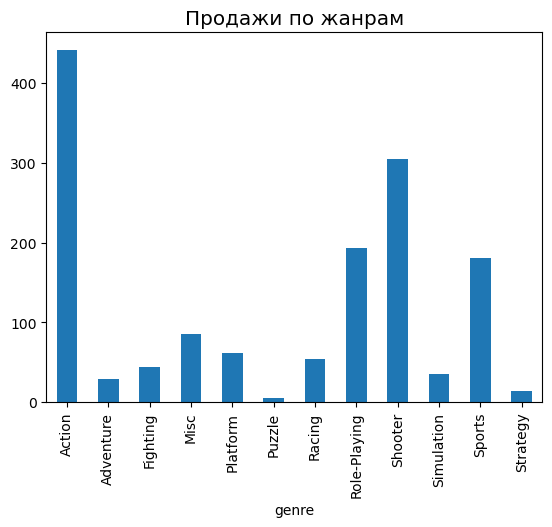

In [28]:
genre = data.groupby('genre')['total_sales'].sum()
genre.plot(kind='bar')
plt.title('Продажи по жанрам', fontsize='x-large')

Text(0.5, 1.0, 'Продажи по жанрам')

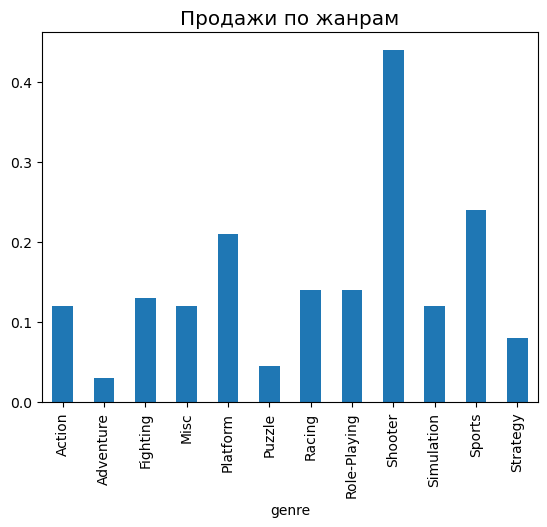

In [29]:
genre = data.groupby('genre')['total_sales'].median()
genre.plot(kind='bar')
plt.title('Продажи по жанрам', fontsize='x-large')

Text(0.5, 1.0, 'Игры по жанрам')

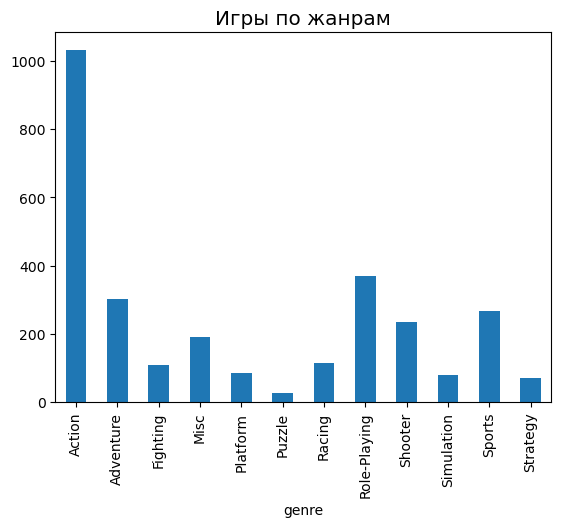

In [30]:
games = data.groupby('genre')['game_title'].count()
games.plot(kind='bar')
plt.title('Игры по жанрам', fontsize='x-large')

Просматривается явная корреляция между количеством выпущенных игр в жанрах: Action, Sports, Misc, RP, Racing, Shooter и их коммерческой успешностью. Медианное значение продаж игр в жанре шутер самое высокое из всех.
Эдвенчуры, симуляторы, стратегии и пазлы продаются плохо.
Платформеры продаются хорошо для своего объема релизов.
Файтинги продаются средне. 

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера V1<a class="tocSkip"></h2>


<b>На доработку🤔:</b>
В данном случае нужно рассмотреть также медианы или средние продажи жанров. На суммарные продажи большое влияние оказывают продажи игр бестселлеров, из-за них общий доход жанра может быть максимальным, а вот средний доход на одну игру наоборот может быть значительно ниже.

<div class="alert alert-success">
<h2> Комментарий ревьюера V2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Именно так, все верно.

## Составляем портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):

   - Самые популярные платформы (топ-5). Опишите различия в долях продаж.
   - Самые популярные жанры (топ-5). Поясните разницу.
   - Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Портрет пользователя в регионе NA

Топ 5 платформ с 2012 года по 2015           na_sales
platform          
X360        139.36
PS3         102.71
PS4          87.25
XOne         78.85
3DS          51.17
Топ 5 платформ последний год           na_sales
platform          
PS4          21.49
XOne         14.27
3DS           4.14
WiiU          2.10
PC            1.36


array([<Axes: ylabel='na_sales'>], dtype=object)

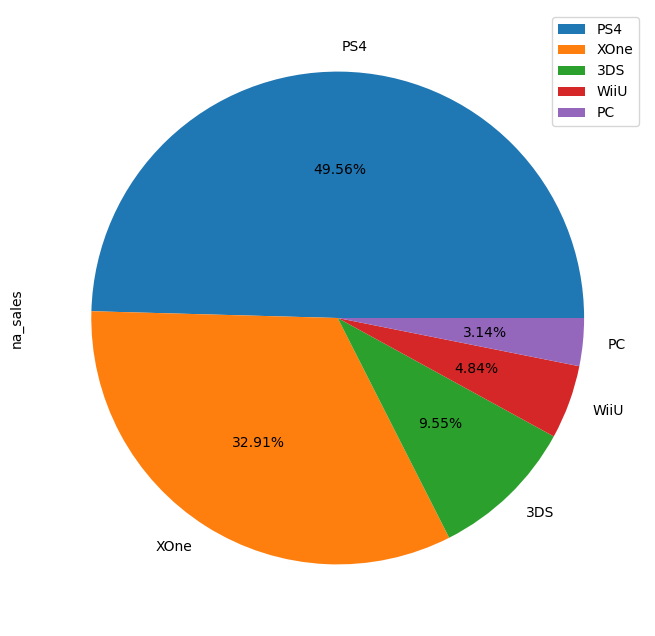

In [31]:
na_sales_all = data.query("na_sales >= 0 " and 'year_of_release <= 2015') #сделаем срез до 2015 года
na_platform_all = na_sales_all.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False)
na_platform_top5_all = na_platform_all.head() # топ 5 платформ за все время кроме последних двух лет

na_sales_last2 = data.query("na_sales >= 0 " and 'year_of_release > 2015') # срез после 2015 года
na_platform_last2 = na_sales_last2.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False)
na_platform_top5_last2 = na_platform_last2.head() # топ 5 платформ за последние два года
print(f'Топ 5 платформ с 2012 года по 2015 {na_platform_top5_all}') # выводим топ 5 платформ с 95 по 14 год
print(f'Топ 5 платформ последний год {na_platform_top5_last2}') # выводим топ 5 платформ за последние 2 года
na_platform_top5_last2.plot(kind='pie', subplots=True, figsize=(8,8), autopct='%1.2f%%')

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера V1<a class="tocSkip"></h2>


<b>На доработку🤔:</b>
Нужно визуализировать данные в пункте с портретами пользователей. Попробуй построить круговую диаграмму, чтобы вывести доли.

<div class="alert alert-success">
<h2> Комментарий ревьюера V2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Правильно все визуализировал.

В регионе Северная Америка на протяжении всего времени доминирует закадычная парочка платформ Sony и Microsoft. Поскольку второе поколение "плойки" доживает свой век, а 360 коробка больше конкурирует с третьим поколением Сони мы видим такую картину. Майки чуть-чуть обгоняют по суммарным продажам вторую плойку, но третья уже на подходе. В топе также присутствует Nintendo со своей инновационной платформой Wii, которая твердо занимает третью строчку топа. Начало эры мобильного гейминга отражается в топе благодаря присутствию "геймбоя" Nintendo DS, который не сильно уступает по объему продаж третьей плойке.

В последние два года ситуация изменилась несильно. Новое 4 поколение Сони лидирует на рынке с большим отрывом от Майков. Нинтендо плотно занимает своими портативными консолями нового поколения 3 и 4 строчки топа, но значительно уступают "диванным консолям". Появление персональных компьютеров в топе должно обратить на себя внимание всей игровой индустрии, поскольку компьютеры с игровым железом становятся все доступнее и популярнее. 

Топ 5 жанров с 2012 года по 2015               na_sales
genre                 
Action          168.55
Shooter         128.53
Sports           73.99
Role-Playing     58.11
Misc             37.43
Топ 5 жанров последний год               na_sales
genre                 
Shooter          16.24
Action            9.29
Sports            7.54
Role-Playing      5.89
Fighting          1.84


array([<Axes: ylabel='na_sales'>], dtype=object)

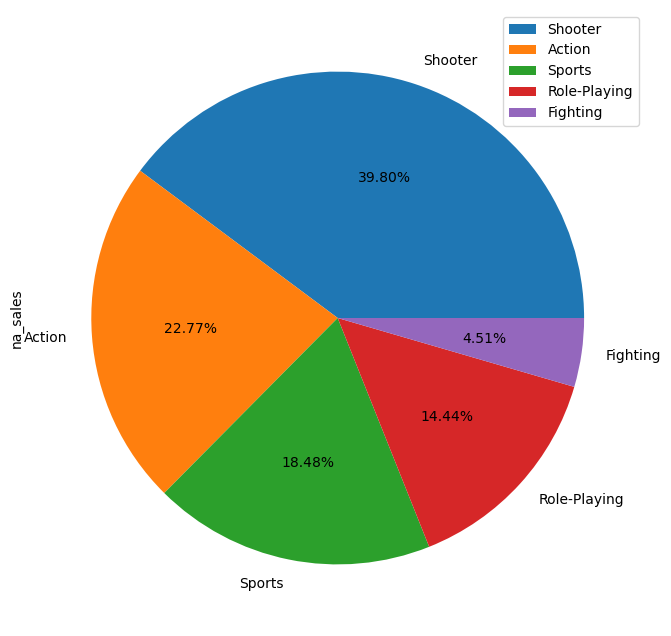

In [32]:
na_genre_all = na_sales_all.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False)
na_genre_top5_all = na_genre_all.head() # топ 5 жанров за все время кроме последних двух лет

na_genre_last2 = na_sales_last2.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False)
na_genre_top5_last2 = na_genre_last2.head() # топ 5 жанров за последние два года
print(f'Топ 5 жанров с 2012 года по 2015 {na_genre_top5_all}') # выводим топ 5 жанров с 95 по 14 год
print(f'Топ 5 жанров последний год {na_genre_top5_last2}') # выводим топ 5 жанров за последние 2 года
na_genre_top5_last2.plot(kind='pie', subplots=True, figsize=(8,8), autopct='%1.2f%%')

По жанрам в общем виде лидируют экшоны, далее спортивные симуляторы и шутеры.

Последние два года акцент пользовательских симпатий сдвинулся в сторону шутеров значительно, экшоны на втором месте, спорт на третьем и внезапно ворвался жанр РПГ и файтинги. 

Text(0, 0.5, 'Объем продаж')

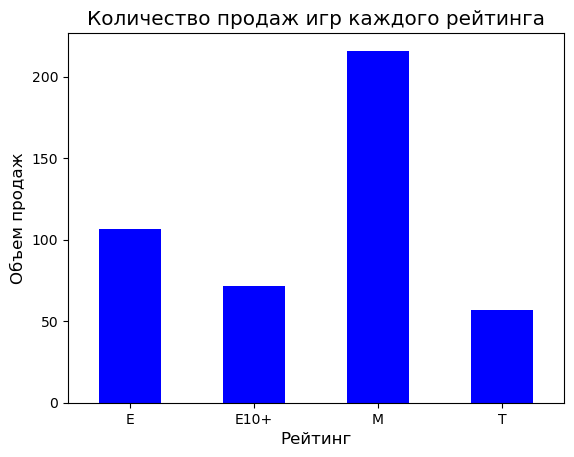

In [33]:
na_sales_all.groupby('rating')['na_sales'].sum().plot(kind='bar', rot=0, color='blue') # продажи по рейтингам за период с 95 по 14 года
plt.title('Количество продаж игр каждого рейтинга', fontsize='x-large')
plt.xlabel('Рейтинг', fontsize='large')
plt.ylabel('Объем продаж', fontsize='large')

Text(0, 0.5, 'Объем продаж')

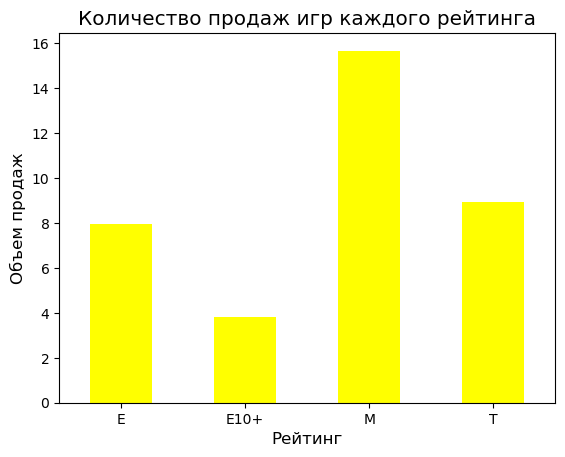

In [34]:
na_sales_last2.groupby('rating')['na_sales'].sum().plot(kind='bar', rot=0, color='yellow') # продажи по рейтингам за последние 2 года
plt.title('Количество продаж игр каждого рейтинга', fontsize='x-large')
plt.xlabel('Рейтинг', fontsize='large')
plt.ylabel('Объем продаж', fontsize='large')

Больше всего за все время продают игры рейтинга M. Продукты с рейтингом E и T вторые по популярности.

В последние два года ситуация такая же. Лидируют игры с рейтингом M, наверное гта5 и прочие подобные франшизы перетянули внимание на себя. Продукты с рейтингом T и E примерно наравне по популярности.

### Портрет пользователя в регионе EU

Топ 5 платформ с 2012 года по 2015           eu_sales
platform          
PS4         109.31
PS3         105.60
X360         73.81
XOne         41.96
3DS          40.31
Топ 5 платформ последний год           eu_sales
platform          
PS4          31.78
XOne          9.63
PC            3.53
3DS           2.33
WiiU          1.48


array([<Axes: ylabel='eu_sales'>], dtype=object)

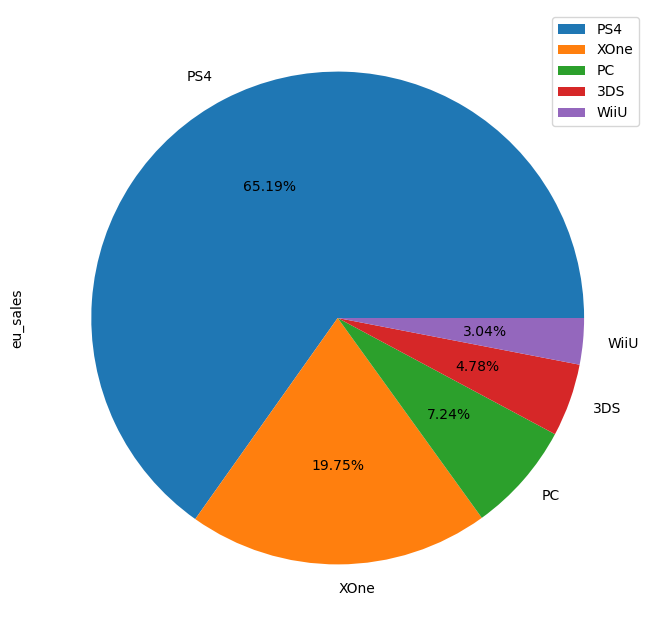

In [35]:
eu_sales_all = data.query("eu_sales >= 0 " and 'year_of_release <= 2015') #сделаем срез до 2015 года
eu_platform_all = eu_sales_all.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False)
eu_platform_top5_all = eu_platform_all.head() # топ 5 платформ за все время кроме последних двух лет

eu_sales_last2 = data.query("eu_sales >= 0 " and 'year_of_release > 2015') # срез после 2015 года
eu_platform_last2 = eu_sales_last2.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False)
eu_platform_top5_last2 = eu_platform_last2.head() # топ 5 платформ за последние два года
print(f'Топ 5 платформ с 2012 года по 2015 {eu_platform_top5_all}') # выводим топ 5 платформ с 95 по 14 год
print(f'Топ 5 платформ последний год {eu_platform_top5_last2}') # выводим топ 5 платформ за последние 2 года
eu_platform_top5_last2.plot(kind='pie', subplots=True, figsize=(8,8), autopct='%1.2f%%')

В европейском регионе больше предпочитают Сони поэтому плойки 2 и 3 поколений на первых двух строчках и закрывают топ первым поколением. Иксбоксы на третьем месте и сильно отстают суммарным продажам Сони. Нинтендо со своей инновационной приставкой Wii уверенно заняла 4 строчку топа.

За последние два года ситуация изменилась частично. Сони все еще лидируют с заметным отрывом благодаря 4 поколению плойки. Майки догоняют на Икс1, но тщетно. ПК-бояре в европе занимают больший процент рынка чем в Северной Америке и опережают мобильные консоли от Нинтендо. 

Топ 5 жанров с 2012 года по 2015               eu_sales
genre                 
Action          148.66
Shooter          97.57
Sports           57.08
Role-Playing     44.25
Misc             25.66
Топ 5 жанров последний год               eu_sales
genre                 
Shooter          15.90
Sports           12.01
Action           10.68
Role-Playing      4.28
Racing            1.77


array([<Axes: ylabel='eu_sales'>], dtype=object)

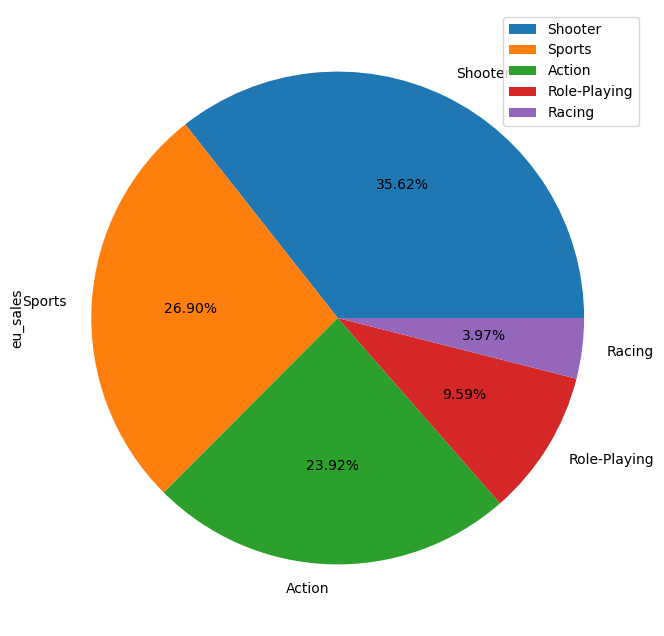

In [36]:
eu_genre_all = eu_sales_all.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False)
eu_genre_top5_all = eu_genre_all.head() # топ 5 жанров за все время кроме последних двух лет

eu_genre_last2 = eu_sales_last2.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False)
eu_genre_top5_last2 = eu_genre_last2.head() # топ 5 жанров за последние два года
print(f'Топ 5 жанров с 2012 года по 2015 {eu_genre_top5_all}') # выводим топ 5 жанров с 95 по 14 год
print(f'Топ 5 жанров последний год {eu_genre_top5_last2}') # выводим топ 5 жанров за последние 2 года
eu_genre_top5_last2.plot(kind='pie', subplots=True, figsize=(8,8), autopct='%1.2f%%')

В европе всегда любили активно проводить время - это отражается и в топе популярности жанров за все время.

В последнее время можно выделить, так же как и в Северной Америке, увеличение популярности РПГ и, особенность для европы, падение популярности гоночек.

Text(0, 0.5, 'Объем продаж')

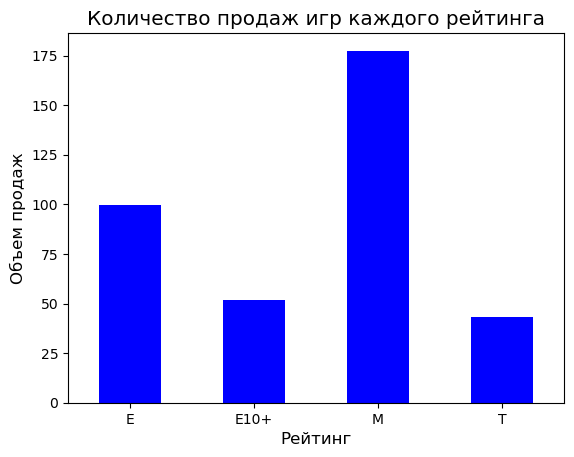

In [37]:
eu_sales_all.groupby('rating')['eu_sales'].sum().plot(kind='bar', rot=0, color='blue') # продажи по рейтингам за период с 95 по 14 года
plt.title('Количество продаж игр каждого рейтинга', fontsize='x-large')
plt.xlabel('Рейтинг', fontsize='large')
plt.ylabel('Объем продаж', fontsize='large')

Text(0, 0.5, 'Объем продаж')

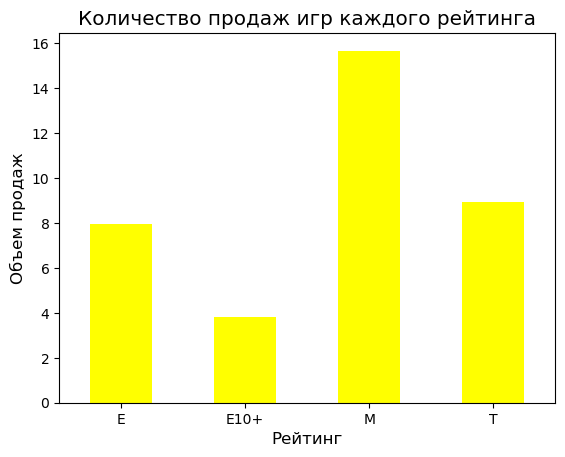

In [38]:
eu_sales_last2.groupby('rating')['na_sales'].sum().plot(kind='bar', rot=0, color='yellow') # продажи по рейтингам за последние 2 года
plt.title('Количество продаж игр каждого рейтинга', fontsize='x-large')
plt.xlabel('Рейтинг', fontsize='large')
plt.ylabel('Объем продаж', fontsize='large')

Схожая с Северной Америкой ситуация: 
1. Раньше рейтинг М был самый популярный. Е и T поровну примерно.
2. Сейчас лидирует жанр для самых взрослых, а Е и T поровну примерно.

### Портрет пользователя в регионе JP

Топ 5 платформ с 2012 года по 2015           jp_sales
platform          
3DS          79.76
PS3          33.99
PSV          17.48
WiiU         12.34
PSP          10.47
Топ 5 платформ последний год           jp_sales
platform          
3DS           8.03
PS4           5.74
PSV           3.56
PS3           1.30
WiiU          0.67


array([<Axes: ylabel='jp_sales'>], dtype=object)

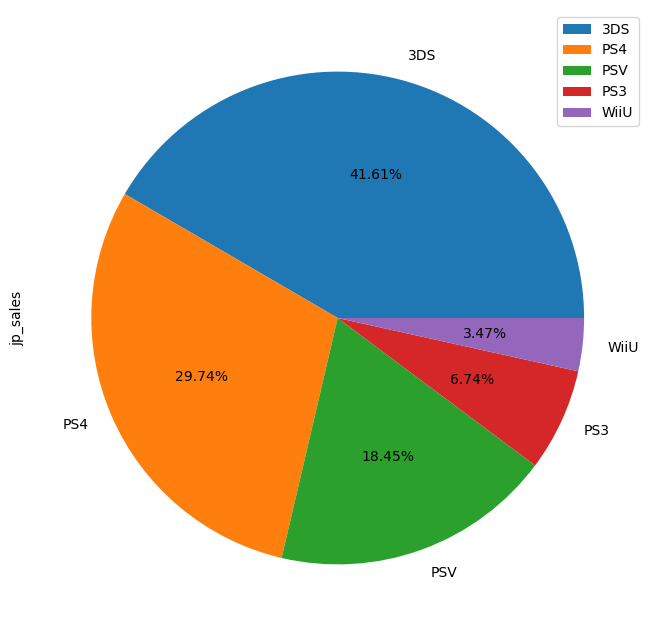

In [39]:
jp_sales_all = data.query("jp_sales >= 0 " and 'year_of_release <= 2015') #сделаем срез до 2015 года
jp_platform_all = jp_sales_all.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False)
jp_platform_top5_all = jp_platform_all.head() # топ 5 платформ за все время кроме последних двух лет

jp_sales_last2 = data.query("jp_sales >= 0 " and 'year_of_release > 2015') # срез после 2015 года
jp_platform_last2 = jp_sales_last2.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False)
jp_platform_top5_last2 = jp_platform_last2.head() # топ 5 платформ за последние два года
print(f'Топ 5 платформ с 2012 года по 2015 {jp_platform_top5_all}') # выводим топ 5 платформ с 95 по 14 год
print(f'Топ 5 платформ последний год {jp_platform_top5_last2}') # выводим топ 5 платформ за последние 2 года
jp_platform_top5_last2.plot(kind='pie', subplots=True, figsize=(8,8), autopct='%1.2f%%')

Япония отличается своими предпочтениями кардинально от всего мира поскольку это вотчина Нинтендо и никто не смеет на нее покушаться. За все время в Японии наибольшую популярность имеет геймбой и его младшая версия. Конечно, Сони, как младший брат, тоже популярна в Японии и занимает половину топа своими "диванными" консолями и портативной версией.

В последние два года ситуация не поменялась вообще. В топе все также две портативные консоли, но в этот раз обе от Нинтендо. Остальные строчки заняла Сони. 

Топ 5 жанров с 2012 года по 2015               jp_sales
genre                 
Role-Playing     58.83
Action           45.73
Misc             11.82
Simulation       10.08
Fighting          8.69
Топ 5 жанров последний год               jp_sales
genre                 
Action            7.07
Role-Playing      6.61
Adventure         1.18
Shooter           1.06
Misc              1.04


array([<Axes: ylabel='jp_sales'>], dtype=object)

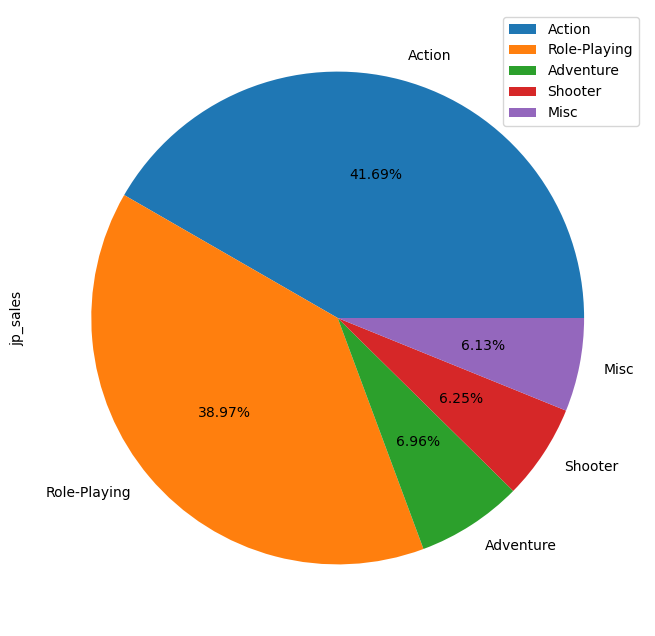

In [40]:
jp_genre_all = jp_sales_all.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False)
jp_genre_top5_all = jp_genre_all.head() # топ 5 жанров за все время кроме последних двух лет

jp_genre_last2 = jp_sales_last2.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False)
jp_genre_top5_last2 = jp_genre_last2.head() # топ 5 жанров за последние два года
print(f'Топ 5 жанров с 2012 года по 2015 {jp_genre_top5_all}') # выводим топ 5 жанров с 95 по 14 год
print(f'Топ 5 жанров последний год {jp_genre_top5_last2}') # выводим топ 5 жанров за последние 2 года
jp_genre_top5_last2.plot(kind='pie', subplots=True, figsize=(8,8), autopct='%1.2f%%')

В японском регионе популярнее всего были РПГ игры, экшоны и спортивные игры на втором-третьем местах. 

В последние два года экшоны обогнали РПГ, в топ выбились эдвенчуры и шутеры.

Text(0, 0.5, 'Объем продаж')

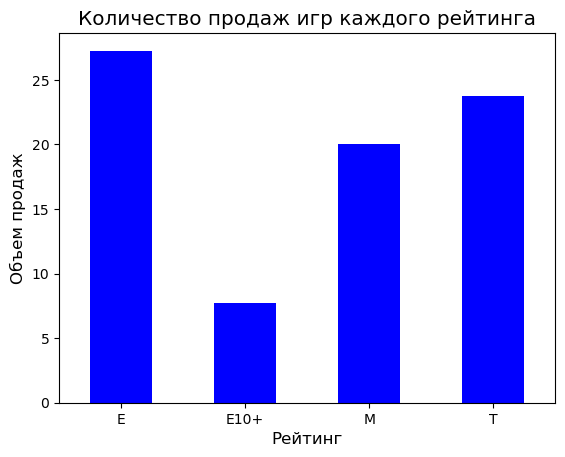

In [41]:
jp_sales_all.groupby('rating')['jp_sales'].sum().plot(kind='bar', rot=0, color='blue') # продажи по рейтингам за период с 95 по 14 года
plt.title('Количество продаж игр каждого рейтинга', fontsize='x-large')
plt.xlabel('Рейтинг', fontsize='large')
plt.ylabel('Объем продаж', fontsize='large')

Text(0, 0.5, 'Объем продаж')

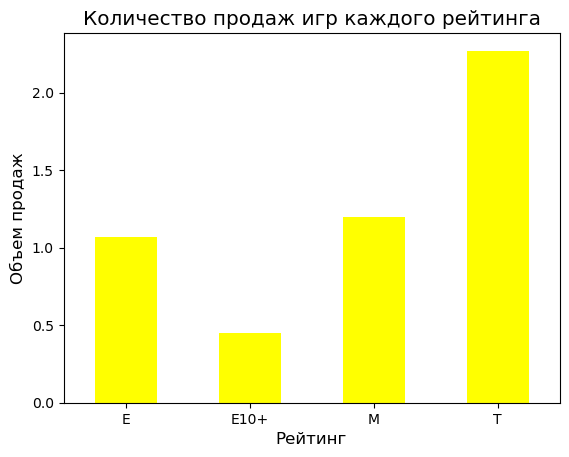

In [42]:
jp_sales_last2.groupby('rating')['jp_sales'].sum().plot(kind='bar', rot=0, color='yellow') # продажи по рейтингам за последние 2 года
plt.title('Количество продаж игр каждого рейтинга', fontsize='x-large')
plt.xlabel('Рейтинг', fontsize='large')
plt.ylabel('Объем продаж', fontsize='large')

По возрастным рейтингам картина в Японии отличается от остальных регионов. E рейтинг сильно опережает все остальное, Т на втором месте, а самому взрослому рейтингу достается лишь третья строчка топа.

Такая же примерно картина и в последние два года. Лидерство у T рейтинга, а E и M поровну.

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Абсолютно верно сформулировал портеты пользователей, продолжай в том же духе!

## Проверка гипотез

Проверим гипотезы:   
   - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
   - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Задайте самостоятельно пороговое значение alpha.
Поясните:
   - Как вы сформулировали нулевую и альтернативную гипотезы;
   - Какой критерий применили для проверки гипотез и почему.

Сформулируем гипотезу:
У нас есть две выборки из некоторых генеральных совокупностей. Необходимо сравнить средние совокупностей по выборкам.
Уровень значимости alpha сделаем на 5%, параметр equal_var = False поскольку выборки разного размера.


Нулевая гипотеза звучит так: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"
Альтернативная двухсторонняя гипотеза звучит так: "Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые"


In [43]:
x_box = data.query('platform == "XOne"')
x_box_rat = x_box['user_score'].dropna()
pc = data.query('platform == "PC"')
pc_rat = pc['user_score'].dropna()

print(f'Средний рейтинг для XOne: {x_box_rat.mean()}, Средний рейтинг для PC: {pc_rat.mean()}')

alpha = 0.05
results = st.ttest_ind(x_box_rat, pc_rat, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

Средний рейтинг для XOne: 6.521428571428572, Средний рейтинг для PC: 6.4286407766990274
p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


Вывод: Значение p-value почти 100 процентов. Таким образом, не возможно отвергнуть нулевую гипотезу.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера V1<a class="tocSkip"></h2>


<b>На доработку🤔:</b>
Правильно сформулировал и проверил гипотезы, однако на итоговый результат большое влияние оказывает период, выбранный для анализа. Нужно проверить гипотезы на актуальных данных.

<div class="alert alert-success">
<h2> Комментарий ревьюера V2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Абсолютно верный вывод, средние оценки данных платформ с большой долей вероятности равны.

Сформулируем гипотезу: У нас есть две выборки из некоторых генеральных совокупностей. Необходимо сравнить средние совокупностей по выборкам. Уровень значимости alpha сделаем на 5%, параметр equal_var = True поскольку выборки близкого размера.

Нулевая гипотеза звучит так: "Средние пользовательские рейтинги жанров Action и Sports одинаковые".
Альтернативная двухсторонняя гипотеза звучит так: "Средние пользовательские рейтинги жанров Action и Sports разные".


In [44]:
action = data.query('genre == "Action"')
action_rat = action['user_score'].dropna()
sports = data.query('genre == "Sports"')
sports_rat = sports['user_score'].dropna()

print(f'Средний рейтинг для Action: {action_rat.mean()}, Средний рейтинг для Sports: {sports_rat.mean()}')

alpha = 0.05
results = st.ttest_ind(action_rat, sports_rat)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


Средний рейтинг для Action: 6.825047801147227, Средний рейтинг для Sports: 5.455897435897437
p-значение: 3.7163089460934874e-26
Отвергаем нулевую гипотезу


Вывод: Значение p-value равно ничтожно. Таким образом, отвергаем Нулевую гипотезу.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера V1<a class="tocSkip"></h2>


<b>На доработку🤔:</b>
Аналогично нужно проверить гипотезы на актуальных данных.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера V2<a class="tocSkip"></h2>


<b>На доработку🤔:</b>
Ты неправильно проверяешь в данном случае гипотезу. Лучше всегда нулевую гипотезу формулировать как равенство средних, ты сформулировал, что оценки разные, но в коде проверяешь другую гипотезу. Метод ttest_ind() в качестве нулевой гипотезы проверяет равенство средних оценок, поэтому нужно изменить гипотезы местами.

<div class="alert alert-success">
<h2> Комментарий ревьюера V3<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Все верно скорректировал, сейчас гипотезы сформулированы и проверены правильно.

## Выводы по проекту

Была поставлена задача выполнить анализ датасета, содержащего информацию о продажах игр одним дистрибьютором за много лет, для составления прогноза на 2017 год по перспективным направлениям рекламы. Перед анализом данных, мы подготовили наш набор, привели к правильным форматам данных и нижнему регистру таблицы и сами названия колонок. Изменили название и типы данных в необходимых столбцах.
По ходу анализа выяснили, что аббревиатура tbd значит to be done. То есть данных еще нет на момент выгрузки датасета. Поэтому заменили tbd на nan для проведения дальнейшего анализа. 
В результате анализа выяснили, что количество игр на игровые приставки и компьютеры начало расти с большой скоростью после 95 года примерно. За весь период консольных приставок топ-10 оказались: 'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS'. 

Судя по графикам средняя продолжительность жизненного цикла одного поколения платформы составляет порядка 10 лет. Самый пик популярности и соответственно продаж наступает примерно через 5 лет после выпуска консоли, в середине жизни платформы.
Исходя из анализа мы увидели, что у Nintendo WII был резкий скачок в 2009 году и такой же резкий провал. Скорее всего потому что инновационная платформа от Нинтендо не смогла полноценно реализовать геймплейный потенциал новых методов ввода. Или разработчики не нашли эти новые возможности как достаточно углубляющие геймплейный опыт чтобы сфокусироваться на разработке игр для этой платформы. 
Проведя анализ оценок пользователей и критиков было выявлено, что оценки критиков и пользователей имеют некоторую связь с продажами самих игр. То есть чем больше оценка критиков или пользователей, тем лучше продажа игры.
Так же определили, что самый популярный жанр за все время это Экшн. На последнем месте стратегии.

В ходе исследования было выявлено, что оценки критиков имеют среднюю корреляцию с продажами, поэтому их стоит учитывать.

После мы составили портреты пользователей каждого региона.


Если брать данные за последний год:


То в Северной Америке:


Топ игровых платформ: PS4, XOne - они занимают 80% всего рынка. 3DS - 10%, PC - 3%.
Топ жанров игр: Shooter, Action, Sports, Role-Playing, Fighting. Жанры распределены примерно поровну. Шутеры и экшоны лидируют.
Топ Рейтингов игр: "M", "T" и "E"


В Европейском регионе:


Топ игровых платформ: PS4, XOne - занимают 90% рынка, но Сони лидирует. 3DS - 5%, PC - 7%.
Топ жанров: Shooter, Sports, Action - делят рынок в основном между собой поровну. Role-Playing и Racing сильно отстают. 
Топ рейтингов: "M", "T" и "E".


В Японском регионе:
Топ игровых платформ: 3DS и PSV - портативные консоли лидеры рынка, PS4 занимает примерно треть. PS3 и WiiU закрывают топ-5.
Топ жанров: Action, Role-Playing - делят рынок пополам, остальные жанры Adventure, Shooter, Misc - довольствуются 1\5 рынка.   
Топ рейтингов: "T", "M" и "E".


Для прогноза будущих продаж лучше брать данные за последние пару лет, так как технологии развиваются весьма быстро. Соответственно, для 2017 года большую часть прибыли будут приносить игры жанров Shooter и Action для платформ PS4 и XOne с рейтингом от 17 и выше. Также есть основания полагать, что игры выпускаемые на портативные консоли и PC тоже будут приносить прибыль. В расчетах относительно будущей успешности конкретного релиза стоит полагаться на оценки критиков, которые имели ранний доступ к контенту.

Отдельно стоит порекомендовать проверить алгоритмы выгрузки таблицы с правильными названиями и типами данных. А также в качестве расширяющего исследования стоит добавить данные по длительности игрового процесса в каждой игре. Эксклюзивность тайтла для каждой платформы. Стоит учитывать не только синглплеерные игры, но и сессионные онлайновые, игры-сервисы и другие так как с развитием мобильного гейминга разнообразие игр и масштаб продаж сильно изменяется. 

<div class="alert alert-warning">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b> В итоговом выводе нужно достаточно подробно написать основные пункты выявленных зависимостей. Стоит доработать вывод с учетом моих комментариев по ходу работы. В итоговом выводе также старайся оставлять рекомендации для последующих шагов. Например рекомендации, что можно обработать и проанализировать другие признаки, на что твоим коллегам стоить обратить внимание.

<div class="alert alert-success">
<h2> Комментарий ревьюера V3<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Отличный вывод, все четко, понятно и структурировано. Вывод в полной мере отражает существующие зависимости, и по нему можно принимать дальнейшие решения.
</div>

<div style="border:solid Chocolate 2px; padding: 40px">

**Общий вывод по проекту**

Спасибо за твой проект! Я уверен, что ты приложил все усилия, чтобы сделать этот проект. Это видно по твоей работе, а сформулированные выводы отражают, насколько успешно ты осваиваешь материал.

**Отмечу отдельные положительные моменты проекта🙂**:

* Ты полностью следовал всем этапам выполнения задания и справился почти со всем. Хорошая работа!
* Отдельно выделю некоторые выводы, которые ты смог сформулировать абсолютно точно!
* У тебя опрятный и читаемый код. Возможно это звучит банально, однако при работе с чужим кодом это крайне важно)


**На что стоит обратить внимание🤓**:

* Важно доработать итоговый вывод.
* Нужно выбрать правильный актуальный период.
* Еще раз построй график "ящик с усами" и проанализируй его.
* Нужно доработать визуализацию по ходу проекта.
* Остальные рекомендации ты найдешь в моих комментариях!


**Желаю удачи и жду твой проект на повторное ревью!**😉

<div style="border:solid Chocolate 2px; padding: 40px">

**Общий вывод по проекту**

**На что стоит обратить внимание🤓**:

* Важно доработать итоговый вывод.
* Еще раз построй график "ящик с усами" и проанализируй его.
* Проверь последнюю гипотезу.
* Остальные рекомендации ты найдешь в моих комментариях!


**Желаю удачи и жду твой проект на повторное ревью!**😉

<div style="border:solid Chocolate 2px; padding: 40px">

Ты отлично справился с данной работой! Видно, как ты успешно осваиваешь материал, применяешь полученные знания на практике. Мне было очень приятно проверять твою работу, надеюсь, мои комментарии и советы были для тебя полезными.

**Желаю удачи в последующем обучении и исследованиях!**😉